In [80]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
housing = pd.DataFrame(pd.read_csv('Housing.csv'))

In [82]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [83]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [84]:
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

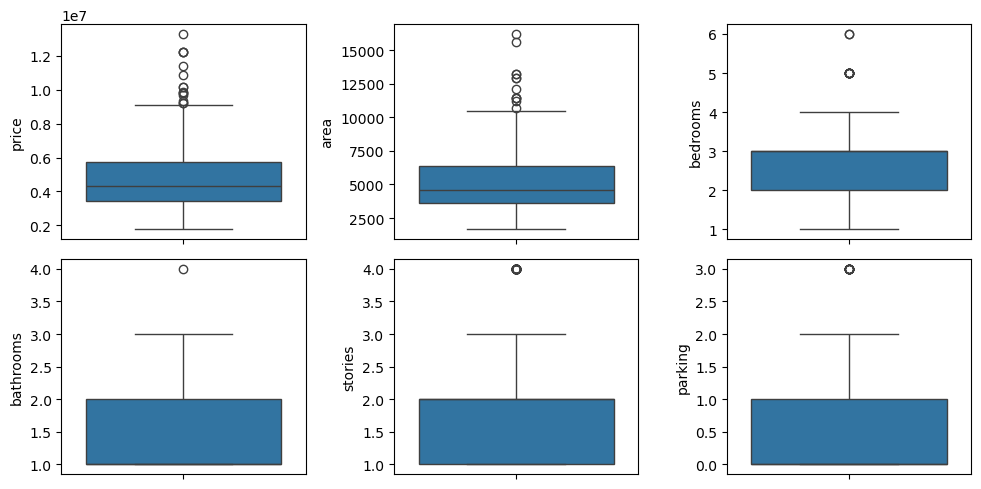

In [85]:
#Checking for outliers with the use of boxplots
#Here we can see that there are a large number of outliers within the price and area range
#We can cut that down with fitting the values between Lower QR and Higher QR
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt4 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt5 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt6 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

In [86]:
#We take out the outliers by using the lower half and upper half
#plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
print(Q1)
Q3 = housing.price.quantile(0.75)
print(Q3)
IQR = Q3-Q1
print(IQR)
lh = Q1 - 1.5*IQR
uh = Q3 + 1.5*IQR
print(lh)
print(uh)
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]
outlier = housing[~(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]
print(housing)
print(outlier)

3430000.0
5740000.0
2310000.0
-35000.0
9205000.0
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15   9100000  6000         4          1        2      yes        no      yes   
16   9100000  6600         4          2        2      yes       yes      yes   
17   8960000  8500         3          2        4      yes        no       no   
18   8890000  4600         3          2        2      yes       yes       no   
19   8855000  6420         3          2        2      yes        no       no   
..       ...   ...       ...        ...      ...      ...       ...      ...   
540  1820000  3000         2          1        1      yes        no      yes   
541  1767150  2400         3          1        1       no        no       no   
542  1750000  3620         2          1        1      yes        no       no   
543  1750000  2910         3          1        1       no        no       no   
544  1750000  3850         3          1        2      yes        no    

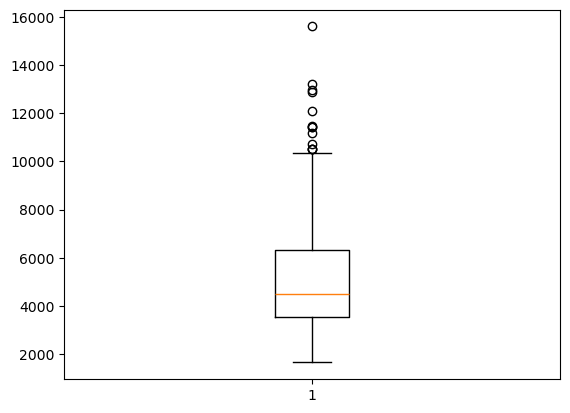

In [87]:
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3-Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

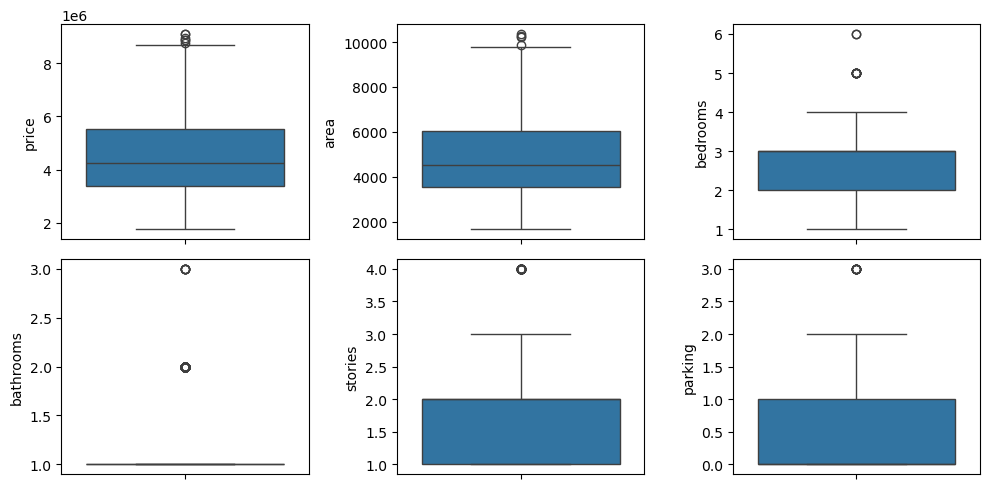

In [88]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt4 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt5 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt6 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

In [89]:
header_list = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
def binary_map(x):
    return x.map({'yes':1 ,'no':0})
housing[header_list] = housing[header_list].apply(binary_map)



In [90]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [91]:
status = pd.get_dummies(housing['furnishingstatus'],dtype = int)
status.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [92]:
status = pd.get_dummies(housing['furnishingstatus'],drop_first = True,dtype = int)
status.head()

,semi-furnished,unfurnished
15,1,0
16,0,1
17,0,0
18,0,0
19,1,0


In [93]:
housing = pd.concat([housing,status] , axis = 1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [94]:
housing.drop(['furnishingstatus'],inplace = True,axis = 1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


In [95]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7 , test_size = 0.3 , random_state = 100)


In [96]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_var = ['price','area','bedrooms','bathrooms','stories','parking']
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,1,0
236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,0,0
425,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,0,0
516,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,0,1


In [97]:
#Next we split the training set into X and Y for the model
Y_train = df_train.pop('price')
X_train = df_train

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,Y_train)

rfe = RFE(estimator = lm , n_features_to_select = 6 )
rfe = rfe.fit(X_train,Y_train)

col = X_train.columns[rfe.support_]
X_train.columns[rfe.support_]

X_train_rfe = X_train[col]

import statsmodels.api as sm

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(Y_train,X_train_rfe).fit()

print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     92.83
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           1.31e-69
Time:                        13:11:09   Log-Likelihood:                 222.77
No. Observations:                 361   AIC:                            -431.5
Df Residuals:                     354   BIC:                            -404.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1097      0.015     

In [98]:
#VIF Model
#I have understood how it works and why it is needed in the analysis part

price_pred = lm.predict(X_train_rfe)

# print(price_pred)

# Model Evaluation

num_vars = ['price','area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

y_test = df_test.pop('price')
x_test = df_test

x_test = sm.add_constant(x_test)

x_test_rfe = x_test[X_train_rfe.columns]

fin_pred = lm.predict(x_test_rfe)
print(housing['price'].head())
final_value = pd.DataFrame(fin_pred.values, columns=['predicted_price'], index=x_test_rfe.index)

#Final Prediction done , still needs a few tweaks to make it ready for user to see
#Need to convert scaled values to real values to show prediction
print(scaler.inverse_transform(final_value))


15    9100000
16    9100000
17    8960000
18    8890000
19    8855000
Name: price, dtype: int64


ValueError: non-broadcastable output operand with shape (156,1) doesn't match the broadcast shape (156,7)